In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
#Load the data
games = pd.read_csv('games.csv')

In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
# exploring the data frame
cols = []
cols = games.columns
print(cols)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


<h4> we have to predict average rating (out of 10) for games  </h4>

In [5]:
print(games.shape)

(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

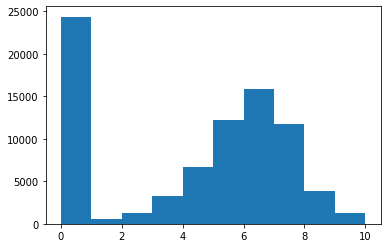

In [6]:
plt.hist(games['average_rating'])

<h4> Right Skewed </h4>

In [7]:
games[games['average_rating'] == 0].iloc[3]

id                            897
type                    boardgame
name                    Dear Abby
yearpublished                1992
minplayers                      3
maxplayers                      4
playingtime                    60
minplaytime                    60
maxplaytime                    60
minage                         13
users_rated                     0
average_rating                  0
bayes_average_rating            0
total_owners                    7
total_traders                   1
total_wanters                   0
total_wishers                   0
total_comments                  0
total_weights                   0
average_weight                  0
Name: 13116, dtype: object

<h4> we see that no users rated many games </h4>

In [8]:
games[games['users_rated']==0].count()

id                      24380
type                    24380
name                    24375
yearpublished           24379
minplayers              24379
maxplayers              24379
playingtime             24379
minplaytime             24379
maxplaytime             24379
minage                  24379
users_rated             24380
average_rating          24380
bayes_average_rating    24380
total_owners            24380
total_traders           24380
total_wanters           24380
total_wishers           24380
total_comments          24380
total_weights           24380
average_weight          24380
dtype: int64

<h4> 24380 games are useless </h4>

<h4> we'll remove all games where no users rated it </h4>

In [9]:
games = games[games['users_rated']>0]

In [10]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

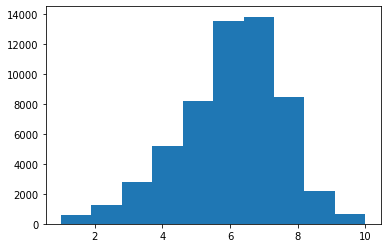

In [13]:
plt.hist(games['average_rating'])

<h4> Pretty much normal distribution </h4>

<h4> Checking for missing values </h4>

In [43]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [15]:
games.shape

(56894, 20)

<h4> Co-Relation Matrix </h4>

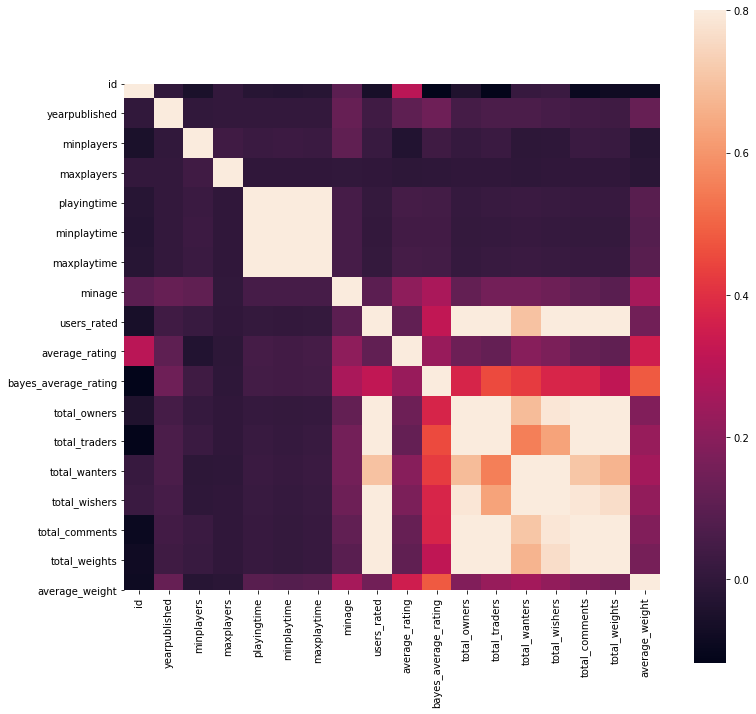

In [16]:
corrmat = games.corr()

fig = plt.figure(figsize = (12,12))

sns.heatmap(corrmat , vmax = 0.8 , square = True)
plt.show()

In [17]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ['bayes_average_rating','average_rating','type','name','id']]

target = 'average_rating'

In [12]:
games = games.dropna(axis=0)

<h4> generating training and test datasets </h4>

In [14]:
from sklearn.model_selection import train_test_split

In [23]:
X = np.asarray(games[columns])

In [24]:
y = games['average_rating']

In [25]:
y = np.asarray(y)

In [26]:
print(X)
print(y)

[[2.0050e+03 2.0000e+00 2.0000e+00 ... 5.3470e+03 2.5620e+03 3.4785e+00]
 [2.0120e+03 2.0000e+00 5.0000e+00 ... 2.5260e+03 1.4230e+03 3.8939e+00]
 [2.0130e+03 1.0000e+00 7.0000e+00 ... 1.7000e+03 7.7700e+02 3.7761e+00]
 ...
 [2.0150e+03 2.0000e+00 6.0000e+00 ... 2.0000e+00 1.0000e+00 1.0000e+00]
 [2.0120e+03 2.0000e+00 2.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [2.0150e+03 2.0000e+00 4.0000e+00 ... 0.0000e+00 2.0000e+00 1.5000e+00]]
[8.33774 8.28798 8.28994 ... 8.      7.      7.     ]


In [27]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
X_train.shape

(45515, 15)

In [29]:
y_train.shape

(45515,)

In [30]:
X_test.shape

(11379, 15)

In [31]:
y_test.shape

(11379,)

<h4> We'll use a Linear Regression Model </h4>

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
pred = model.predict(X_test)

In [36]:
mean_squared_error(pred,y_test)

2.0584235216030993

In [37]:
from sklearn.linear_model import Ridge

In [38]:
clf = Ridge(alpha=100.0,random_state = 30,normalize = True)

In [39]:
clf.fit(X_train, y_train)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=30, solver='auto', tol=0.001)

In [40]:
pred = clf.predict(X_test)

In [41]:
mean_squared_error(pred,y_test)

2.4049592742598986

In [42]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=3.0)

In [43]:
clf.fit(X_train, y_train)

Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
pred = clf.predict(X_test)

In [45]:
mean_squared_error(pred,y_test)

2.264103180196679

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
regr = RandomForestRegressor(n_estimators = 400, max_depth=20, random_state=1)

In [48]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [49]:
pred = regr.predict(X_test)

In [50]:
mean_squared_error(pred,y_test)

1.4147720028434692